В Pygmo запрогроммировать две своих тестовых функции и найти их оптимум 3 разными алгоритмами доступными в библиотеке и получить таблицу сравнения

In [1]:
import pygmo as pg
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

## Класс реализации проблемы

In [2]:
class BenchmarkFunction:
    def __init__(self, 
                 name: str, 
                 bounds: np.ndarray,
                 function: callable
                 ) -> None:
    
        self.name = name
        self.bounds = bounds
        self.function = function
    

    def fitness(self, 
                X: np.ndarray) -> list:
        # Функция необходимая для pygmo

        return [self.function(X)]

    def get_bounds(self) -> np.ndarray:
        return self.bounds

## Функция для построение графика минимизации функции

In [3]:
def plot_minimization(problem, fitness_list, number_evols):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.plot(np.arange(0, number_evols), fitness_list, color='darkgreen', label='Значение функции')

    champion_n = np.argmin(np.array(fitness_list))
    ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r', label='Абсолютный чемпион')

    ax.set_xlim((0, number_evols))
    ax.grid('major')
    ax.set_title(f'Динамика значения лучшего индивида в поколении для проблемы {problem.name}', fontweight='bold')
    ax.set_xlabel('Номер поколения')
    ax.set_ylabel('Значение минимизируемой функции')
    ax.legend(loc='upper right')
    plt.tight_layout()

    plt.show()

## Функция для построения поверхности функции и отображение точек с минимальными значениями

In [4]:
def plot_surface(prob, individuals_list):
    best_x = [point[0] for point in individuals_list]
    best_y = [point[1] for point in individuals_list]

    grid_points = 100

    (x_min, y_min), (x_max, y_max) = prob.get_bounds()
    x_vector = np.linspace(x_min, x_max, grid_points)
    y_vector = np.linspace(y_min, y_max, grid_points)
    x_grid, y_grid = np.meshgrid(x_vector, y_vector)
    z_grid = np.zeros((grid_points, grid_points))
    
    for i in range(x_grid.shape[1]):
        for j in range(x_grid.shape[0]):
            z_grid[i, j] = prob.fitness([x_grid[i, j], y_grid[i, j]])[0]

    fig, ax = plt.subplots(figsize=(9,5))
    cs = ax.contour(x_grid, y_grid, z_grid, 50, zorder=0)
    
    ax.scatter(best_x, best_y, marker='x', color='r', zorder=1)

    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    ax.set_title('Поверхность функции', fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    cbar = fig.colorbar(cs)
    cbar.ax.set_ylabel('Значение функции $f$')

    plt.show()

## Функция МакКормика

In [18]:
mac = BenchmarkFunction(
    name="Функция МакКормика",
    bounds=np.array([[-10, -10], [10, 10]]),
    function=lambda X: np.sin(X[0] + X[1]) + (X[0] - X[1])**2 - 1.5*X[0] + 2.5*X[1]
)

# Функция Химмельблау

In [8]:
him = BenchmarkFunction(
    name="Функция Химмельблау",
    bounds=np.array([[-10, -10], [10, 10]]),
    function=lambda X: (X[0]**2 + X[1] - 11)**2 + (X[1]**2 + X[0] - 7)**2
)

# Функция Матьяса

In [9]:
mat = BenchmarkFunction(
    name="Функция Матьяса",
    bounds=np.array([[-10, -10], [10, 10]]),
    function=lambda X: 0.26 * (X[0]**2 + X[1]**2) - 0.48 * X[0] * X[1]
)

### Объявляем константы

In [10]:
pop_size=100
seed=130
number_evols=100
gen=10

df = pd.DataFrame(columns=['Function','Method', 'Pop_Size',
                           'Num_Geners', 'Num_Evoluts', 
                           'Min_Coordinates', 'Function_Value'])

## Функция для тестирования алгоритма

In [20]:
def train(prob, algo, f):
    pop = pg.population(prob, size=pop_size, seed=seed)

    individuals_list = []
    fitness_list = []
    for i in range(number_evols):
        pop = algo.evolve(pop)
        individuals_list.append(pop.get_x()[pop.best_idx()])
        fitness_list.append(pop.get_f()[pop.best_idx()])

    data = [f, algo.get_name(), pop_size, gen, 
            number_evols, np.around(pop.champion_x, 5), np.around(pop.champion_f, 5)]
    
    df.loc[len(df)] = data

    return pop, individuals_list, fitness_list

## GWO

In [21]:
algo = pg.algorithm(pg.gwo(gen=gen))

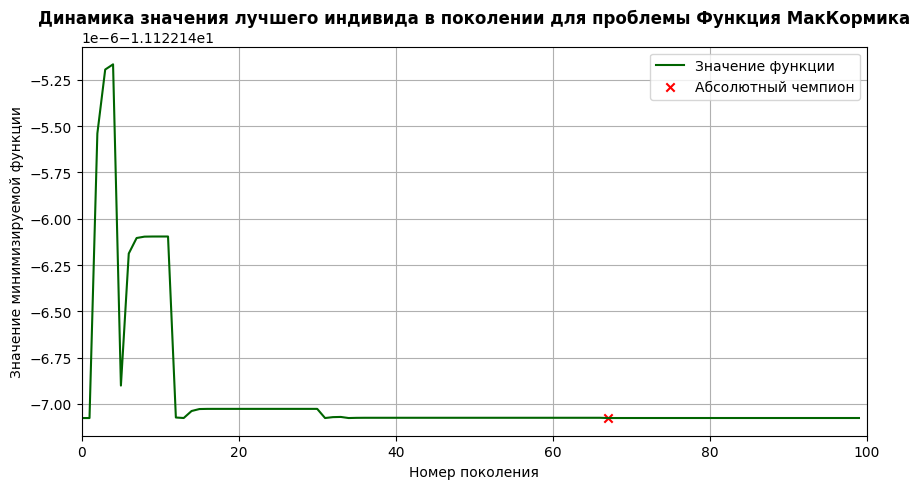

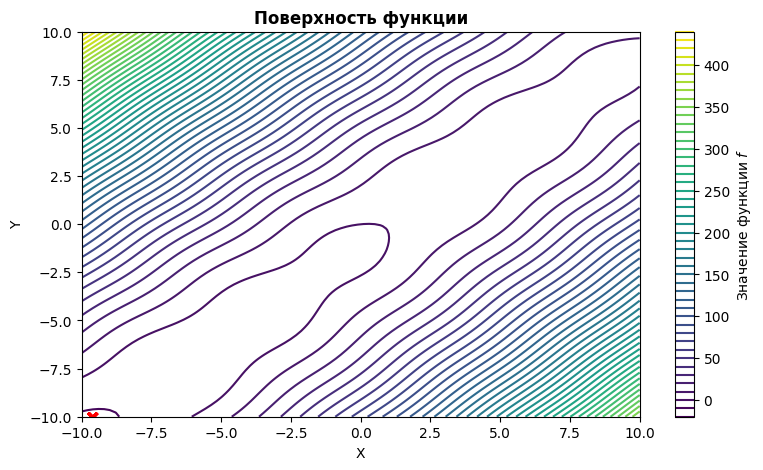

In [23]:
prob = pg.problem(mac)

pop, individuals_list, fitness_list = train(prob, algo, mac.name)
plot_minimization(mac, fitness_list, number_evols)
plot_surface(mac, individuals_list)

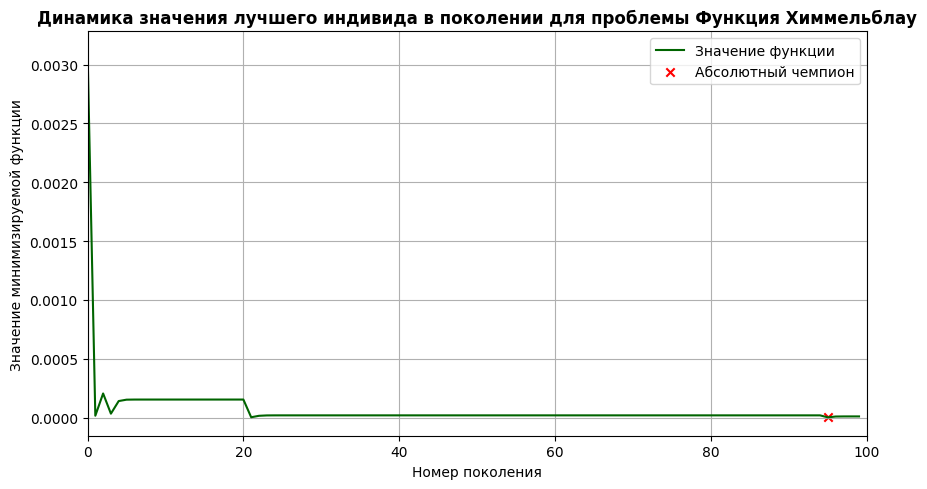

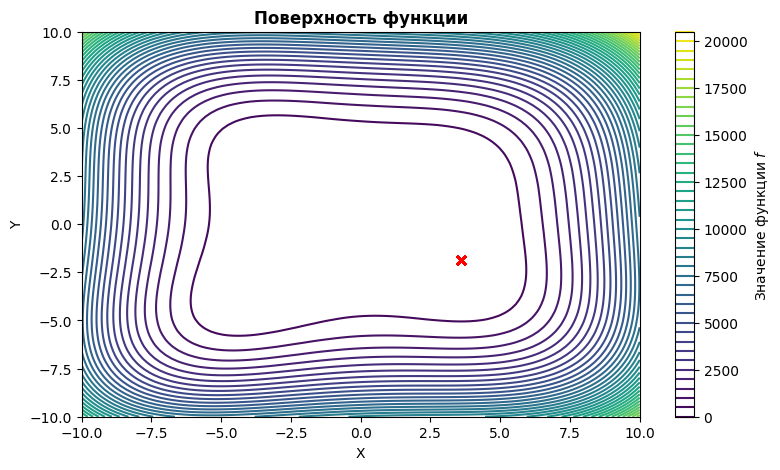

In [24]:
prob = pg.problem(him)

pop, individuals_list, fitness_list = train(prob, algo, him.name)
plot_minimization(him, fitness_list, number_evols)
plot_surface(him, individuals_list)

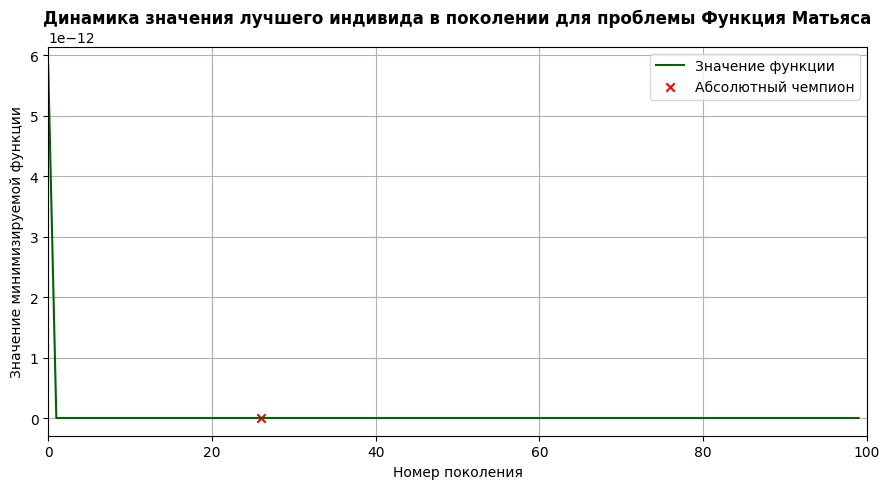

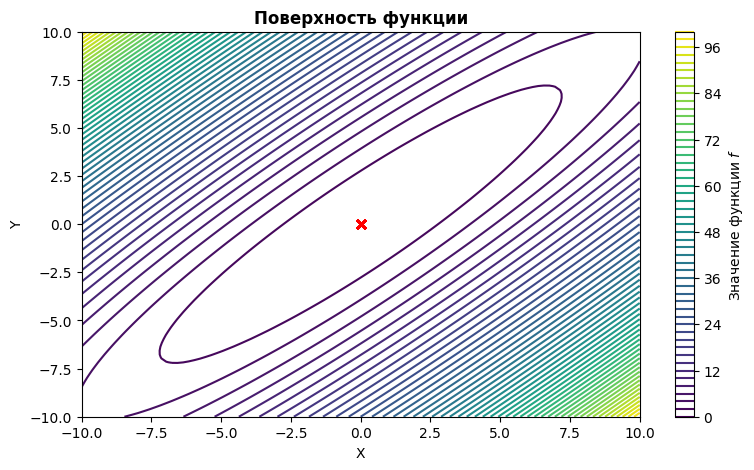

In [25]:
prob = pg.problem(mat)

pop, individuals_list, fitness_list = train(prob, algo, mat.name)
plot_minimization(mat, fitness_list, number_evols)
plot_surface(mat, individuals_list)

## SADE

In [26]:
algo = pg.algorithm(pg.sade(gen=gen))

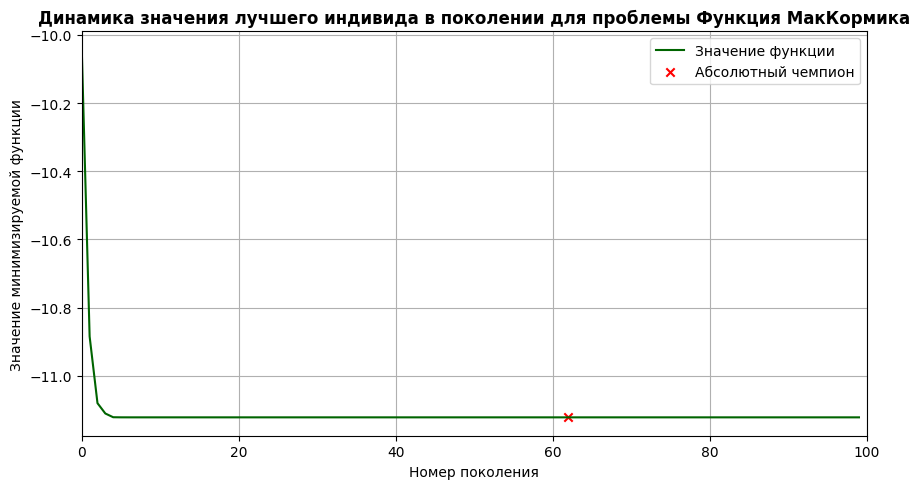

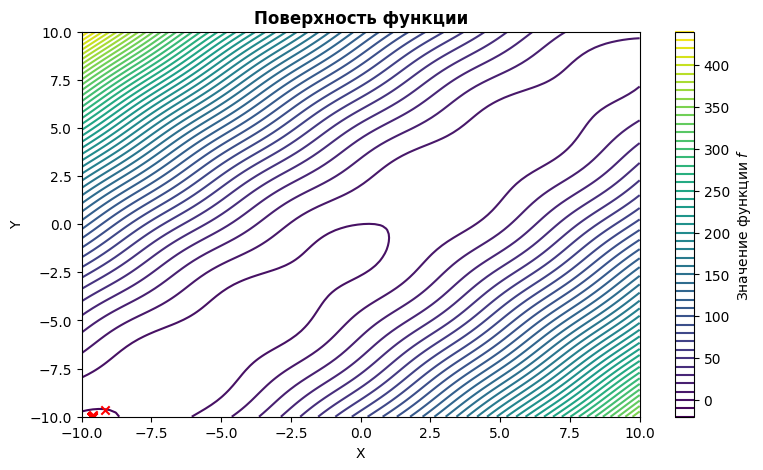

In [27]:
prob = pg.problem(mac)

pop, individuals_list, fitness_list = train(prob, algo, mac.name)
plot_minimization(mac, fitness_list, number_evols)
plot_surface(mac, individuals_list)

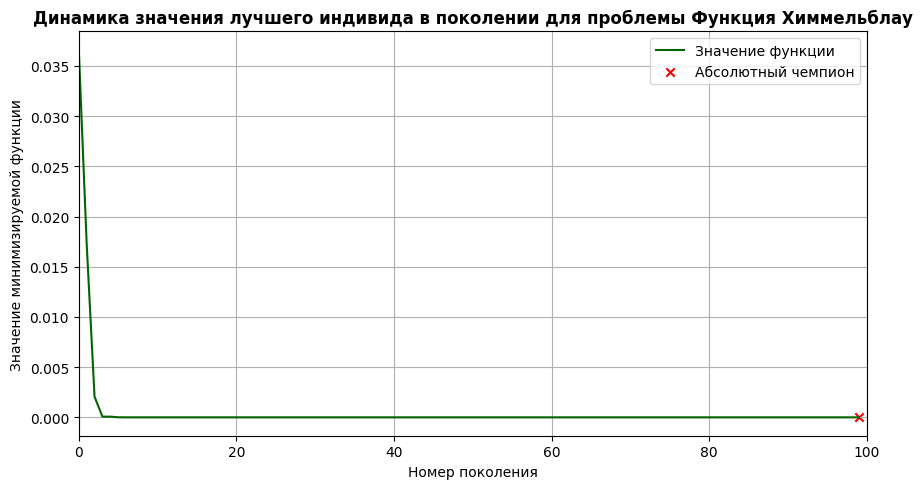

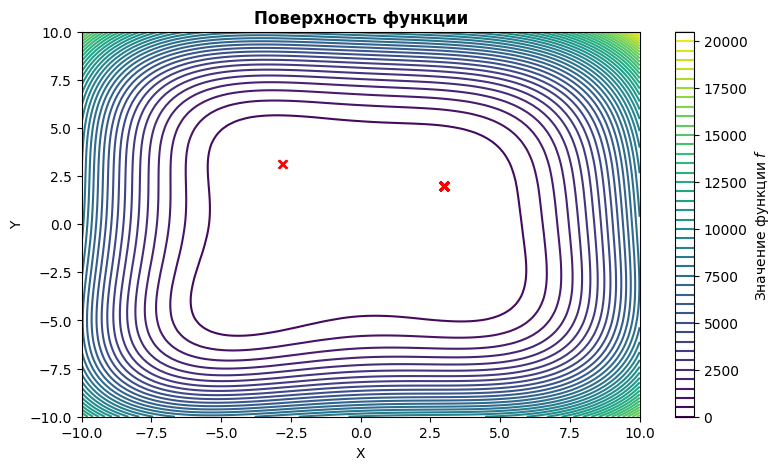

In [28]:
prob = pg.problem(him)

pop, individuals_list, fitness_list = train(prob, algo, him.name)
plot_minimization(him, fitness_list, number_evols)
plot_surface(him, individuals_list)

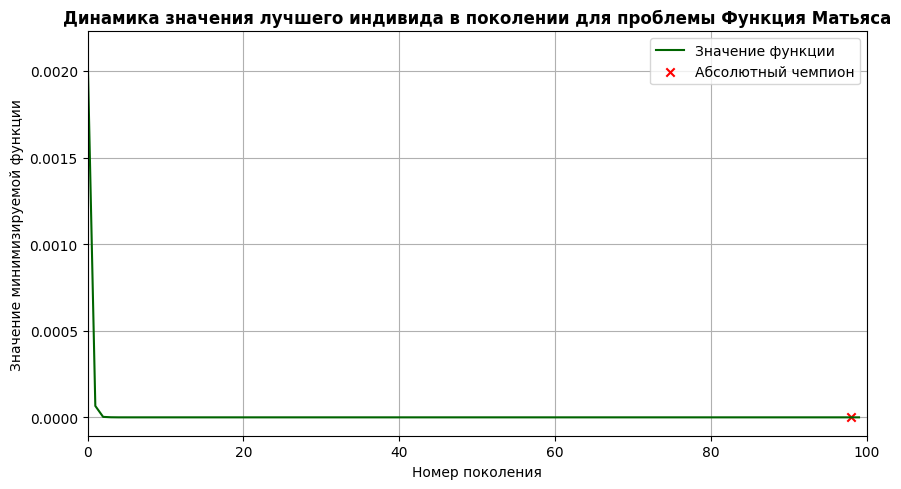

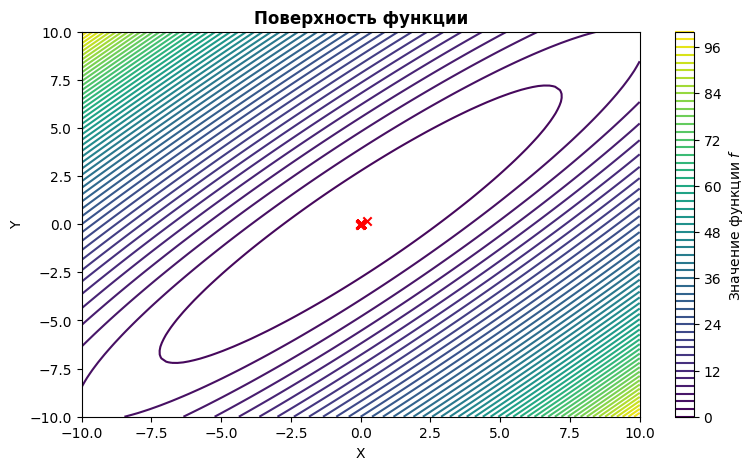

In [29]:
prob = pg.problem(mat)

pop, individuals_list, fitness_list = train(prob, algo, mat.name)
plot_minimization(mat, fitness_list, number_evols)
plot_surface(mat, individuals_list)

## GACO

In [30]:
algo = pg.algorithm(pg.gaco(gen=gen))

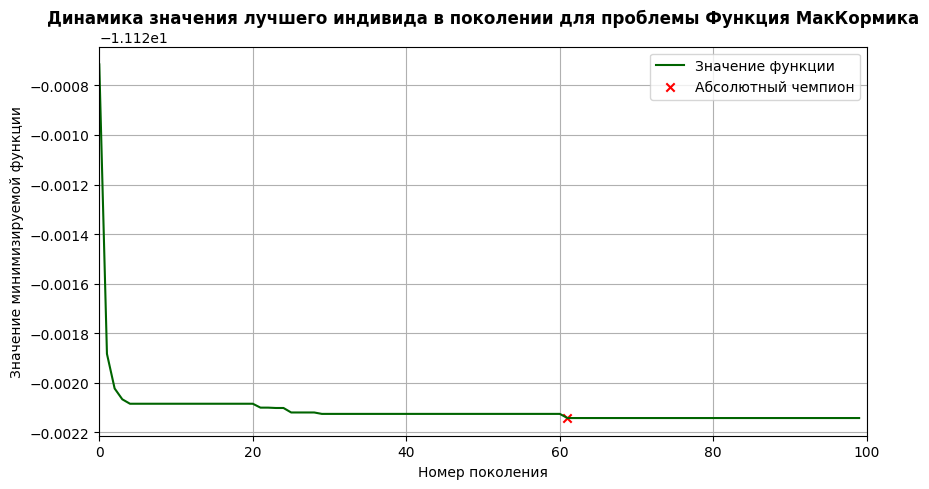

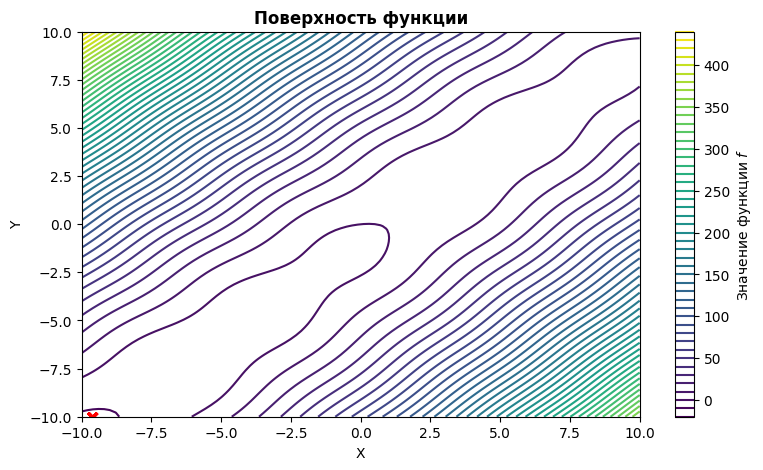

In [31]:
prob = pg.problem(mac)

pop, individuals_list, fitness_list = train(prob, algo, mac.name)
plot_minimization(mac, fitness_list, number_evols)
plot_surface(mac, individuals_list)

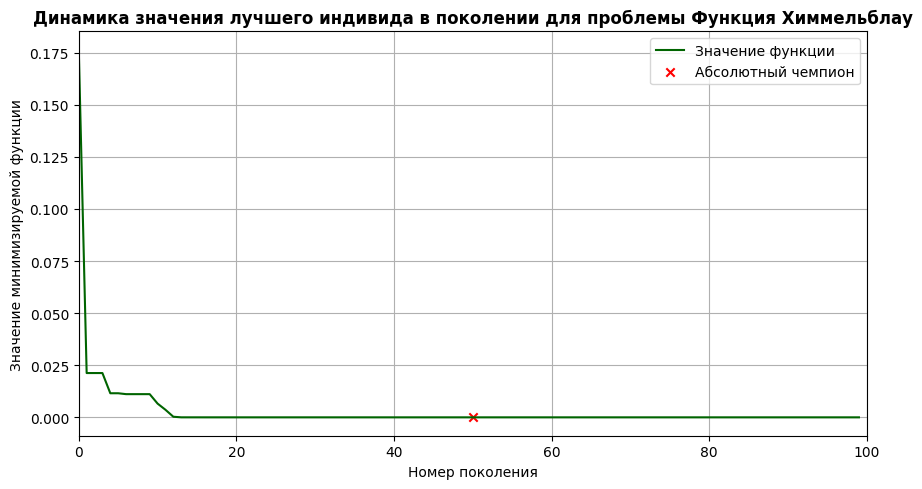

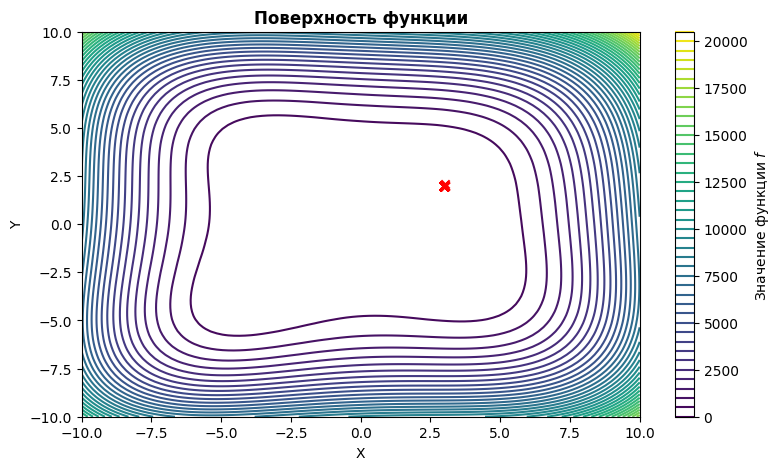

In [32]:
prob = pg.problem(him)

pop, individuals_list, fitness_list = train(prob, algo, him.name)
plot_minimization(him, fitness_list, number_evols)
plot_surface(him, individuals_list)

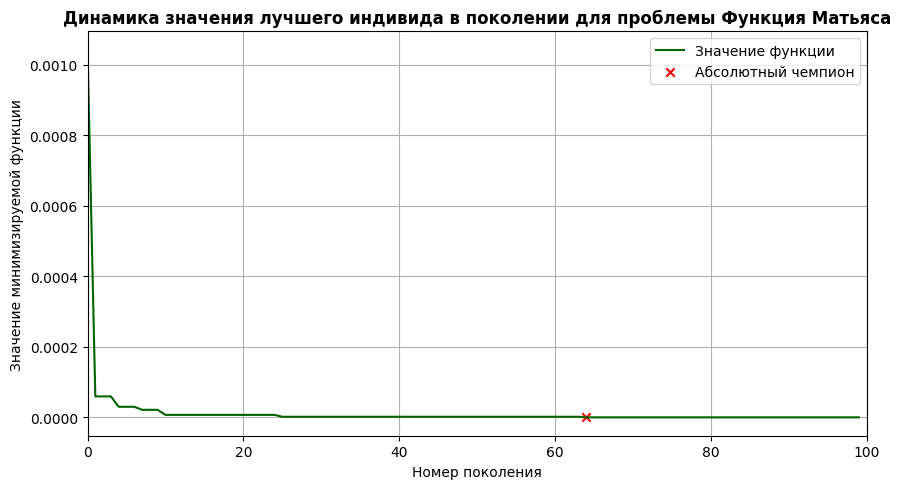

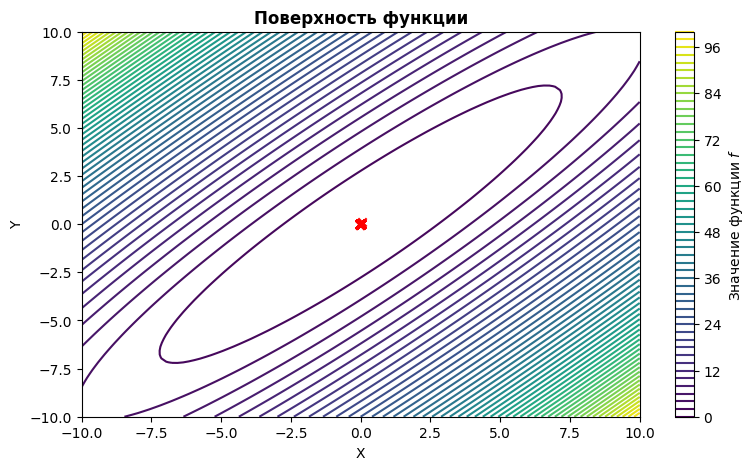

In [33]:
prob = pg.problem(mat)

pop, individuals_list, fitness_list = train(prob, algo, mat.name)
plot_minimization(mat, fitness_list, number_evols)
plot_surface(mat, individuals_list)

In [37]:
df

,Function,Method,Pop_Size,Num_Geners,Num_Evoluts,Min_Coordinates,Function_Value
1,Функция МакКормика,GWO: Grey Wolf Optimizer,100,10,100,"[-9.61168, -10.0]",[-11.12215]
2,Функция Химмельблау,GWO: Grey Wolf Optimizer,100,10,100,"[3.5843, -1.84841]",[0.0]
3,Функция Матьяса,GWO: Grey Wolf Optimizer,100,10,100,"[0.0, 0.0]",[0.0]
4,Функция МакКормика,saDE: Self-adaptive Differential Evolution,100,10,100,"[-9.61168, -10.0]",[-11.12215]
5,Функция Химмельблау,saDE: Self-adaptive Differential Evolution,100,10,100,"[3.0, 2.0]",[0.0]
6,Функция Матьяса,saDE: Self-adaptive Differential Evolution,100,10,100,"[0.0, 0.0]",[0.0]
7,Функция МакКормика,GACO: Ant Colony Optimization,100,10,100,"[-9.6135, -10.0]",[-11.12214]
8,Функция Химмельблау,GACO: Ant Colony Optimization,100,10,100,"[3.00008, 1.99982]",[0.0]
9,Функция Матьяса,GACO: Ant Colony Optimization,100,10,100,"[-0.00163, -0.00206]",[0.0]
